In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
d = pd.read_csv('spambase_csv.csv')

In [4]:
d

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [7]:
correct_dict={}
correct_dict=dict(d.corr()['class'])

In [8]:
features = []
for key,values in correct_dict.items():
    if abs(values)<0.2:
        features.append(key)

In [9]:
d = d.drop(features,axis=1)

In [10]:
d

,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_receive,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_your,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,char_freq_%21,char_freq_%24,capital_run_length_longest,capital_run_length_total,class
0,0.32,0.00,0.00,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.96,0.00,0.00,0.0,0.0,0.778,0.000,61,278,1
1,0.14,0.28,0.21,0.07,0.00,0.21,0.14,0.07,0.28,3.47,1.59,0.43,0.43,0.0,0.0,0.372,0.180,101,1028,1
2,1.23,0.19,0.19,0.12,0.64,0.38,0.06,0.06,1.03,1.36,0.51,1.16,0.06,0.0,0.0,0.276,0.184,485,2259,1
3,0.63,0.00,0.31,0.63,0.31,0.31,0.31,0.00,0.00,3.18,0.31,0.00,0.00,0.0,0.0,0.137,0.000,40,191,1
4,0.63,0.00,0.31,0.63,0.31,0.31,0.31,0.00,0.00,3.18,0.31,0.00,0.00,0.0,0.0,0.135,0.000,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.00,0.0,0.0,0.000,0.000,3,88,0
4597,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,2.00,0.00,0.00,0.0,0.0,0.353,0.000,4,14,0
4598,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,1.50,0.30,0.00,0.00,0.0,0.0,0.000,0.000,6,118,0
4599,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.32,0.00,0.00,0.0,0.0,0.000,0.000,5,78,0


In [11]:
y=d['class']
X=d.drop(['class'],axis=1)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

In [13]:
linear_regression = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
multi_nb = MultinomialNB(alpha=0.2)
decision_tr = DecisionTreeClassifier(min_samples_split=7, random_state=111)
k_neighbours = KNeighborsClassifier(n_neighbors=49)
random_fc = RandomForestClassifier(n_estimators=31, random_state=111)

In [14]:
def train_classifier(object,dt,label):
  object.fit(dt,label)

def predict_classifier(pr_object,test_dt):
  return(pr_object.predict(test_dt))

In [16]:
score_list = []
graph_sc = []
cls_dictionary = {'Linear_Regression': linear_regression,'SVC' : svc,'Multi_NB':multi_nb,'Decision_Tree': decision_tr,'KNN':k_neighbours,'Random_Forest': random_fc}
for key,value in cls_dictionary.items():
  train_classifier(value,X_train,y_train)
  pred_val = predict_classifier(value,X_test)
  graph_sc.append([accuracy_score(y_test,pred_val)])
  score_list.append((key,[accuracy_score(y_test,pred_val)]))
print(score_list)

[('Linear_Regression', [0.889210716871832]), ('SVC', [0.5952208544532948]), ('Multi_NB', [0.6712527154236061]), ('Decision_Tree', [0.8819695872556119]), ('KNN', [0.7414916727009413]), ('Random_Forest', [0.941346850108617])]


Text(0, 0.5, 'accuracy scores')

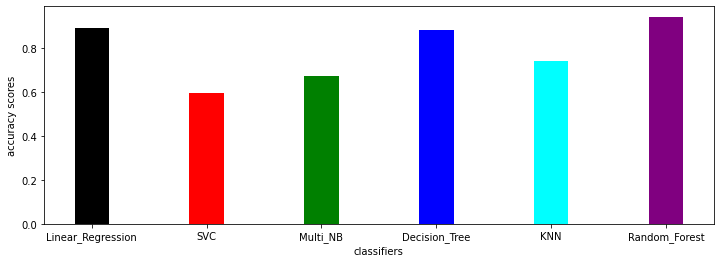

In [19]:
from nltk import flatten
flattened_list = flatten(graph_sc)
models = list(cls_dictionary.keys())

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.bar(models,flattened_list,width=0.3,color=['black', 'red', 'green', 'blue', 'cyan','purple'])
plt.xlabel('classifiers')
plt.ylabel('accuracy scores')